In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats
import galhalo
import mcmc_aux

## playing with sigma

In [3]:
data = mcmc_aux.mock_SAGA_survey([2,0.1,0.3], SAGA_ind=8)

In [4]:
sigma_pix = 50
sigma = np.linspace(0, 3, sigma_pix)
s1_mat = np.zeros(shape=(sigma_pix, 169))
s2_mat1 = np.zeros(shape=(sigma_pix, 9000))
s2_mat2 = np.zeros(shape=(sigma_pix, 9000))


for i in range(sigma_pix):

    models_i = mcmc_aux.satgen_models([2,0,sigma[i]], data.lgMh)
    models_i.get_stats(min_mass=6.5)

    s1_mat[i] = models_i.stat.Pnsat
    s2_mat1[i] = models_i.stat.Msmax
    s2_mat2[i] = models_i.stat.ecdf_MsMax 

In [5]:
norm = mpl.colors.Normalize(vmin=sigma.min(), vmax=sigma.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, sigma_pix))
halo_masses = np.linspace(7,13,100)

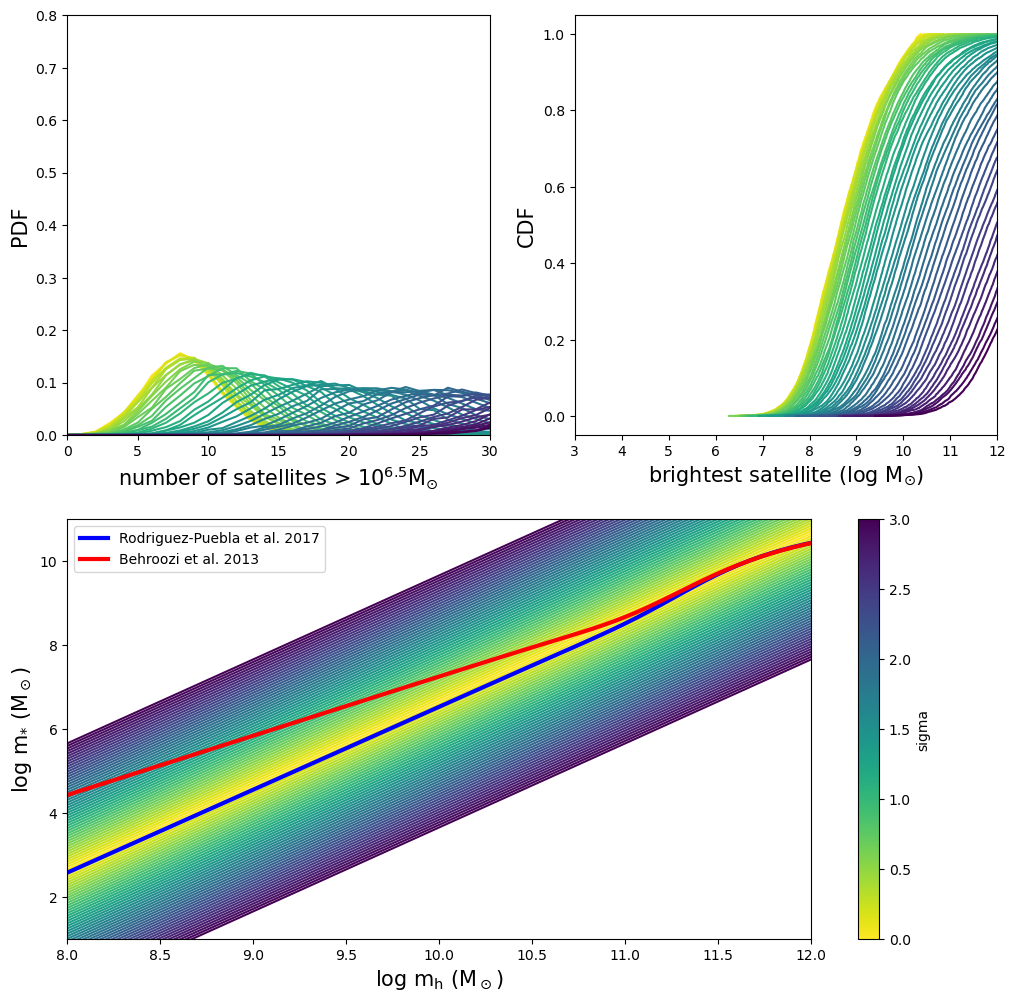

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(221)
for i in range(sigma_pix):
    plt.plot(np.arange(s1_mat.shape[1]), s1_mat[i], color=colors[i])
plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,30)
plt.ylim(0,0.8)

plt.subplot(222)
for i in range(sigma_pix):
    plt.plot(s2_mat1[i], s2_mat2[i], color=colors[i])
plt.xlabel("brightest satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.xlim(3,12)


plt.subplot(212)
for i in range(sigma_pix):
    if sigma[i] > 0:
        plt.plot(halo_masses, galhalo.SHMR_1D(halo_masses, alpha=2)-sigma[i], color=colors[i])
        plt.plot(halo_masses, galhalo.SHMR_1D(halo_masses, alpha=2)+sigma[i], color=colors[i])
    else:
        plt.plot(halo_masses, galhalo.SHMR_1D(halo_masses, alpha=2), color=colors[i])
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses), lw=3, color="blue", label="Rodriguez-Puebla et al. 2017")
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses), lw=3, color="red", label="Behroozi et al. 2013")
plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
plt.ylim(1,11)
plt.xlim(8,12)
plt.colorbar(cmap, label="sigma")
plt.legend()
plt.show()

In [13]:
np.average(np.std(test, axis=0))

0.9925880525784655

In [9]:
test

array([ 0.66      ,  0.78121212,  0.90242424,  1.02363636,  1.14484848,
        1.26606061,  1.38727273,  1.50848485,  1.62969697,  1.75090909,
        1.87212121,  1.99333333,  2.11454545,  2.23575758,  2.3569697 ,
        2.47818182,  2.59939394,  2.72060606,  2.84181818,  2.9630303 ,
        3.08424242,  3.20545455,  3.32666667,  3.44787879,  3.56909091,
        3.69030303,  3.81151515,  3.93272727,  4.05393939,  4.17515152,
        4.29636364,  4.41757576,  4.53878788,  4.66      ,  4.78121212,
        4.90242424,  5.02363636,  5.14484848,  5.26606061,  5.38727273,
        5.50848485,  5.62969697,  5.75090909,  5.87212121,  5.99333333,
        6.11454545,  6.23575758,  6.3569697 ,  6.47818182,  6.59939394,
        6.72060606,  6.84181818,  6.9630303 ,  7.08424242,  7.20545455,
        7.32666667,  7.44787879,  7.56909091,  7.69030303,  7.81151515,
        7.93272727,  8.05393939,  8.17515152,  8.29636364,  8.41757576,
        8.53878788,  8.66      ,  8.78121212,  8.90242424,  9.02